# Наследование и полиморфизм

## Принципы ООП
Объектно-ориентированное программирование основывается на четырёх ключевых принципах, которые помогают структурировать код, упростить его поддержку и расширение.  
Эти принципы работают вместе и делают программы гибкими, модульными и удобными в расширении.


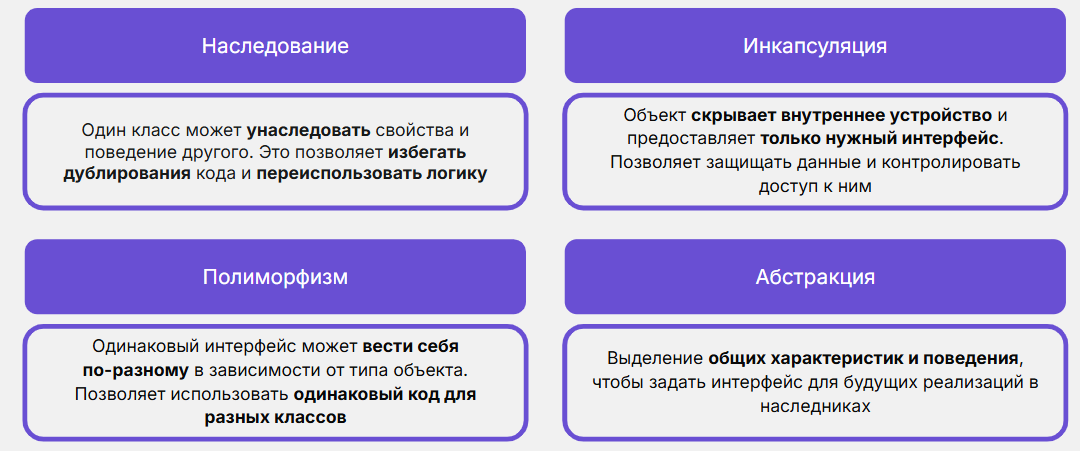

### Зачем знать принципы?
* Помогают понять, как правильно проектировать классы и объекты
* Упрощают понимание механизмов наследования, переопределения и взаимодействия объектов
* Позволяют писать гибкий, расширяемый и поддерживаемый код


## Наследование  
Наследование — это механизм, который позволяет одному классу перенять свойства и поведение другого.
Это один из ключевых принципов ООП, который помогает избегать дублирования кода и повторно использовать общую логику.
#### Кто кого наследует?  
Класс, от которого наследуются — называется родительский класс, базовый класс или суперкласс.  
Класс, который наследует — называется дочерний класс, производный класс или подкласс.  
#### Зачем нужно наследование?  
* Чтобы избежать дублирования кода, выделив общее поведение в один базовый класс
* Чтобы удобно расширять существующую логику без переписывания старых классов
* Чтобы работать с разными объектами одинаково, если они наследуются от общего предка

**Синтаксис:**
```
class Parent:
    # родительский класс
    ...

class Child(Parent):
    # дочерний класс, наследует всё от Parent
    ...
```

In [ ]:
#Пример: наследование полей и методов 
class Employee:
    def __init__(self, name):
        self.name = name

    def work(self):
        print(f"{self.name} is working...")

class Programmer(Employee):
    pass

class Manager(Employee):
    pass

programmer = Programmer("Alice")
manager = Manager("Bob")

programmer.work()
manager.work()


* Employee — базовый класс, который хранит имя сотрудника и умеет работать.
* Programmer и Manager наследуют всё от Employee:
и поле name, и метод work().
* Каждый из них может использовать эти возможности без повторного определения.

**Особенности:**  
* Дочерний класс наследует все поля и методы родительского класса
* Можно добавлять свои методы и поля, не затрагивая родителя
* Можно переопределять поведение, если нужно изменить работу унаследованного метода


## Полиморфизм
Полиморфизм (от греч. «много форм») — это возможность использовать один и тот же интерфейс для разных типов объектов.
Иными словами, разные классы могут реализовывать один и тот же метод по-своему, а вызывающий код будет работать с ними одинаково.
#### Зачем нужен полиморфизм?
* Позволяет писать универсальный код, не заботясь о типе объекта
* Упрощает расширение программы — можно добавлять новые типы, не меняя старую логику
* Делает код гибким и читаемым
#### Механизмы полиморфизма
Полиморфизм в Python реализуется через переопределение методов (overriding), когда дочерний класс заново определяет метод, унаследованный от родителя.
При вызове такого метода используется реализация из дочернего класса.


In [ ]:
#Пример: переопределение метода 
class Employee:

    def __init__(self, name):
        self.name = name

    def work(self):
        print(f"{self.name} is working...")

class Programmer(Employee):
    def work(self):
        print(f"{self.name} writing code...")

class Manager(Employee):
    def work(self):
        print(f"{self.name} managing team...")


staff = [Programmer("Alice"), Manager("Bob"), Programmer("Bill")]

for person in staff:
    person.work()  # Поведение зависит от конкретного типа


* У всех сотрудников есть метод work(), но он реализован по-разному.
* В списке staff мы храним объекты разных классов: Programmer, Manager.
* При вызове person.work() Python автоматически вызывает нужную версию метода в зависимости от того, к какому классу относится объект.
* Это и есть полиморфизм: один вызов → разное поведение в зависимости от типа объекта.



## Функция super
При наследовании часто возникает ситуация, когда родительский класс уже задаёт общие поля в __init__(), а в дочернем классе необходимо добавить новые поля.  
Чтобы **не дублировать одинаковый код** используется функция super() — она вызывает ближайший метод родителя.


In [ ]:
class Employee:
    def __init__(self, name):
        self.name = name

class Programmer(Employee):
    def __init__(self, name, language):
        super().__init__(name)  # вызываем родительский __init__
        self.language = language

class Manager(Employee):
    def __init__(self, name, department):
        super().__init__(name)  # вызываем родительский __init__
        self.department = department

p = Programmer("Alice", "Python")
print(p.name)
print(p.language)


##### Функция super в обычных методах
Функция super полезна не только в __init__(), но и в любых других методах, где нужно расширить поведение родителя, а не полностью его заменить.


In [ ]:
#Пример: расширение обычного метода 
class Employee:
    def work(self):
        print("Employee is doing general tasks.")

class Programmer(Employee):
    def work(self):
        super().work()  # вызываем метод родителя
        print("Programmer is writing code.")

class Manager(Employee):
    def work(self):
        super().work()
        print("Manager is holding a meeting.")

staff = [Programmer(), Manager()]
for person in staff:
    person.work()
    print()


#### Чем эффективен super?
* Автоматически находит метод в ближайшем родителе
* Позволяет избежать дублирования кода
* Гарантирует корректную работу при изменении иерархии классов
#### Когда использовать super?
* Когда родитель уже делает нужную инициализацию, и мы хотим её сохранить
* Когда расширяем (а не полностью заменяем) поведение метода
* Особенно важно при множественном наследовании — super() автоматически учитывает порядок вызова


In [ ]:
#Найди ошибку в коде:
class Employee:
    def __init__(self, name):
        self.name = name

class Programmer(Employee):
    def __init__(self, name, language):
        super(name).__init__()
        self.language = language


### Функции isinstance и issubclass
Python предоставляет удобные встроенные функции для проверки типов и иерархии классов, что особенно полезно при работе с наследованием и полиморфизмом.
### Функция isinstance
`isinstance` — это встроенная функция Python, которая позволяет проверить, является ли объект экземпляром определённого класса или его подкласса, чтобы выбрать правильное поведение.  
Если объект принадлежит указанному классу или его наследнику, функция возвращает True, в противном случае — False.  
Функция isinstance также работает со встроенными типами (str, list, int и т.д.)  

**Синтаксис:**  
```
isinstance(obj, some_class)
isinstance(obj, tuple_of_classes)
```
* obj — объект, который необходимо проверить
* some_class — класс, принадлежность к которому необходимо проверить
* tuple_of_classes — кортеж из нескольких классов, принадлежность к любому из которых необходимо проверить


In [ ]:
class Employee:
    pass

class Programmer(Employee):
    pass

class Manager(Employee):
    pass

e = Employee()
p = Programmer()
m = Manager()

print(isinstance(p, Programmer))  # экземпляр класса
print(isinstance(p, Employee))    # экземпляр наследника
print(isinstance(p, Manager))     # Manager не находится выше в иерархии


#### Пример использования в коде
Допустим, у некоторых сотрудников есть метод write_code(), но не у всех. Чтобы не получить ошибку при вызове, проверим, принадлежит ли объект к нужному классу. 


In [ ]:
class Employee:
    def work(self):
        print("Выполняет общие задачи")

class Programmer(Employee):
    def write_code(self):
        print("Пишет код")

class BackendDeveloper(Programmer):
    def write_code(self):
        print("Пишет серверный код")

class FrontendDeveloper(Programmer):
    def write_code(self):
        print("Пишет интерфейс")

class Manager(Employee):
    def work(self):
        print("Проводит собрание")


staff = [
    Programmer(),
    BackendDeveloper(),
    FrontendDeveloper(),
    Manager(),
    Employee()
]

for person in staff:
    if isinstance(person, Programmer):
        person.write_code()
    else:
        person.work()


#### Проверка на несколько классов
Можно проверить, принадлежит ли объект к одному из нескольких классов, передав кортеж.


In [ ]:
print(isinstance("hello", (str, int)))  # Строка принадлежит к одному из классов


### Функция issubclass
`issubclass` — это встроенная функция Python, которая позволяет проверить,
является ли один класс подклассом другого, то есть наследуется ли он от указанного класса.  
Функция возвращает True, если класс наследуется от другого класса напрямую или через цепочку, и False — если нет.  
**Синтаксис:**   
```
issubclass(class_a, class_b)
issubclass(class_a, tuple_of_classes)
```
* class_a — класс, который мы проверяем
* class_b — предполагаемый родительский класс
* tuple_of_classes — кортеж из нескольких классов


In [ ]:
class Employee:
    pass

class Programmer(Employee):
    pass

class Manager(Employee):
    pass

class BackendDeveloper(Programmer):
    pass

print(issubclass(Programmer, Employee))         # Прямой потомок
print(issubclass(BackendDeveloper, Programmer)) # Прямой потомок
print(issubclass(BackendDeveloper, Employee))   # Потомок через цепочку
print(issubclass(Manager, Programmer))          # Разные ветки иерархии
print(issubclass(Employee, object))             # Все классы наследуют от object


### Наследование от object
В Python все классы неявно наследуются от встроенного класса object, даже если это явно не указывается.
Класс object — это корневой класс всей иерархии классов в Python. 


In [ ]:
class Book:
    pass


Даже если мы не указываем родителя, Python воспринимает это так: 


In [ ]:
class Book(object):
    pass

### Методы от object
Класс object предоставляет набор базовых методов, существующих в любом классе сразу после его создания, но обычно требующих переопределения. Это магические методы — специальные служебные функции, которые Python автоматически вызывает в определенных ситуациях. С одним из таких методов, __init__(), мы уже знакомы. Список уже существующих в классе методов можно увидеть с помощью функции dir():


In [ ]:
print(dir(Book))

### Магический метод __str__
Один из важных магических методов — `__str__()`. Он присутствует в классе без собственной реализации, поскольку он унаследован от базового класса object. Обратиться к этому методу можно либо напрямую, через `__str__()`, либо просто попытавшись вывести объект в консоль с помощью функции `print()`:


In [ ]:
b = Book()

print(b.__str__())  # Вызов метода __str__ напрямую
print(b)            # Вызов метода __str__


Когда объект выводится через `print()`, Python вызывает магический метод `__str__()`, чтобы получить строковое представление объекта, которое будет показано пользователю.
* По умолчанию, если метод `__str__()` не определён, Python выводит техническую информацию — тип и адрес объекта в памяти, что не информативно.
* Определение метода `__str__()` позволяет вернуть читаемую строку о содержимом объекта.
* Используйте его, чтобы показать основную информацию об объекте.


In [ ]:
class Book:
    def __init__(self, title, author):
        self.title = title
        self.author = author

book = Book("1984", "George Orwell")
print(book)

In [ ]:
class Book:
    def __init__(self, title, author):
        self.title = title
        self.author = author

    def __str__(self):
        return f"{self.title} by {self.author}"

book = Book("1984", "George Orwell")
print(book)       		# вызывает __str__
print(str(book))  		# вызывает __str__
print(book.__str__()) 	# вызывает __str__


**Особенности:** 
* Не должен ничего выводить сам — только возвращать строку  
* Вызывается автоматически при `print(obj)` или `str(obj)`   

**Преимущества наследования от object**
* Все классы получают единое поведение по умолчанию
* Все объекты можно безопасно использовать с базовыми функциями и методами
* Это делает классы совместимыми со встроенными механизмами Python (например, `print()` вызывает `__str__()` из object, если не переопределено)


# Практические задания
1. **Класс Employee**  
Создайте класс Employee, представляющий сотрудника.  
У каждого объекта должно быть поле name.  
Метод work() выводит строку: <имя> is working....  
Проверьте работу класса, создав сотрудника и вызвав метод work().

*Пример вывода:*  
`Alice is working...`


In [ ]:
class Employee:
    def __init__(self, name):
        self.name = name

    def work(self):
        print(f"{self.name} is working...")

e = Employee("Alice")
e.work()


2. **Класс Developer**  
Создайте класс Developer, который расширяет Employee.  
* Добавьте дополнительное поле language.  
* Переопределите метод work(), чтобы он включал сообщение из родительского метода и добавлял строку:  
<имя> writes <язык> code.  
* Проверьте работу, создав объект Developer и вызвав метод work().
  
*Пример вывода:*   
Bob is working...  
Bob writes Python code.


In [ ]:
class Developer(Employee):
    def __init__(self, name, language):
        super().__init__(name)
        self.language = language

    def work(self):
        super().work()
        print(f"{self.name} writes {self.language} code.")

d = Developer("Bob", "Python")
d.work()
